In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda
from torchvision import transforms
from torch.distributions import Normal
from torchvision.utils import save_image
import time
import tqdm
import matplotlib.pyplot as plt
import models

# VAE

In [2]:
training_data = datasets.MNIST(
    root="./", train=True, download=False, transform=ToTensor())
test_data = datasets.MNIST(
    root="./", train=False, download=False, transform=ToTensor())

In [3]:
input_dim = 784
latent_dim = 20

vae = models.VAE(input_dim, latent_dim).cuda()
optimizer = optim.Adam(vae.parameters(), lr=0.001)

In [4]:
def train_vae(vae, train_loader, optimizer, num_epochs):
    loss_history = []
    vae.train()
    for epoch in range(num_epochs):
        total_loss = 0
        pbar = tqdm.tqdm(train_loader,
                         leave=True,
                         ncols=70,
                         unit='batch')
        start_time = time.time()
        for batch_id, (x, _) in enumerate(pbar):
            x = x.cuda()
            optimizer.zero_grad()
            x = x.view(-1, input_dim)
            x_hat, mu, logvar = vae(x)
            loss = models.vae_loss(x_hat, x, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            pbar.set_description("Batch {}/{}".format(batch_id+1, len(train_loader)))
        end_time = time.time()
        loss_history.append(total_loss / len(train_loader.dataset))
        print('Epoch [{}/{}], Total Loss: {:.3f}, Time: {:.2f}s'.format(
            epoch + 1, 
            num_epochs, total_loss / len(train_loader.dataset), 
            end_time - start_time))
    return loss_history

In [5]:
num_epochs = 100
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
loss_history = train_vae(vae, train_loader, optimizer, num_epochs)

Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.97batch/s]


Epoch [1/100], Total Loss: 43.320, Time: 37.57s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.97batch/s]


Epoch [2/100], Total Loss: 34.492, Time: 37.57s


Batch 938/938: 100%|█████████████| 938/938 [00:36<00:00, 25.45batch/s]


Epoch [3/100], Total Loss: 32.929, Time: 36.86s


Batch 938/938: 100%|█████████████| 938/938 [00:38<00:00, 24.53batch/s]


Epoch [4/100], Total Loss: 32.162, Time: 38.24s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.90batch/s]


Epoch [5/100], Total Loss: 31.715, Time: 37.68s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.90batch/s]


Epoch [6/100], Total Loss: 31.388, Time: 37.68s


Batch 938/938: 100%|█████████████| 938/938 [00:40<00:00, 23.36batch/s]


Epoch [7/100], Total Loss: 31.149, Time: 40.16s


Batch 938/938: 100%|█████████████| 938/938 [00:36<00:00, 25.43batch/s]


Epoch [8/100], Total Loss: 31.010, Time: 36.89s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.69batch/s]


Epoch [9/100], Total Loss: 30.833, Time: 38.00s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.95batch/s]


Epoch [10/100], Total Loss: 30.760, Time: 37.59s


Batch 938/938: 100%|█████████████| 938/938 [00:38<00:00, 24.55batch/s]


Epoch [11/100], Total Loss: 30.650, Time: 38.21s


Batch 938/938: 100%|█████████████| 938/938 [00:41<00:00, 22.60batch/s]


Epoch [12/100], Total Loss: 30.528, Time: 41.50s


Batch 938/938: 100%|█████████████| 938/938 [00:43<00:00, 21.35batch/s]


Epoch [13/100], Total Loss: 30.481, Time: 43.93s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.87batch/s]


Epoch [14/100], Total Loss: 30.407, Time: 37.72s


Batch 938/938: 100%|█████████████| 938/938 [00:39<00:00, 23.53batch/s]


Epoch [15/100], Total Loss: 30.341, Time: 39.87s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.94batch/s]


Epoch [16/100], Total Loss: 30.287, Time: 37.61s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.35batch/s]


Epoch [17/100], Total Loss: 30.201, Time: 37.00s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.22batch/s]


Epoch [18/100], Total Loss: 30.174, Time: 37.20s


Batch 938/938: 100%|█████████████| 938/938 [00:36<00:00, 25.37batch/s]


Epoch [19/100], Total Loss: 30.106, Time: 36.98s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.19batch/s]


Epoch [20/100], Total Loss: 30.070, Time: 37.23s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.31batch/s]


Epoch [21/100], Total Loss: 29.983, Time: 37.06s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.25batch/s]


Epoch [22/100], Total Loss: 29.929, Time: 37.15s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.29batch/s]


Epoch [23/100], Total Loss: 29.907, Time: 37.10s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.26batch/s]


Epoch [24/100], Total Loss: 29.869, Time: 37.15s


Batch 938/938: 100%|█████████████| 938/938 [00:36<00:00, 25.36batch/s]


Epoch [25/100], Total Loss: 29.790, Time: 36.99s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.29batch/s]


Epoch [26/100], Total Loss: 29.780, Time: 37.08s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.13batch/s]


Epoch [27/100], Total Loss: 29.744, Time: 37.32s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.31batch/s]


Epoch [28/100], Total Loss: 29.690, Time: 37.07s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.25batch/s]


Epoch [29/100], Total Loss: 29.678, Time: 37.15s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.35batch/s]


Epoch [30/100], Total Loss: 29.618, Time: 37.00s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.24batch/s]


Epoch [31/100], Total Loss: 29.590, Time: 37.17s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.93batch/s]


Epoch [32/100], Total Loss: 29.570, Time: 37.62s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.22batch/s]


Epoch [33/100], Total Loss: 29.524, Time: 37.20s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.19batch/s]


Epoch [34/100], Total Loss: 29.488, Time: 37.25s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.31batch/s]


Epoch [35/100], Total Loss: 29.492, Time: 37.06s


Batch 938/938: 100%|█████████████| 938/938 [00:36<00:00, 25.44batch/s]


Epoch [36/100], Total Loss: 29.436, Time: 36.87s


Batch 938/938: 100%|█████████████| 938/938 [00:36<00:00, 25.41batch/s]


Epoch [37/100], Total Loss: 29.392, Time: 36.92s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.32batch/s]


Epoch [38/100], Total Loss: 29.386, Time: 37.05s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.33batch/s]


Epoch [39/100], Total Loss: 29.376, Time: 37.04s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.19batch/s]


Epoch [40/100], Total Loss: 29.329, Time: 37.25s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.29batch/s]


Epoch [41/100], Total Loss: 29.336, Time: 37.09s


Batch 938/938: 100%|█████████████| 938/938 [00:36<00:00, 25.48batch/s]


Epoch [42/100], Total Loss: 29.313, Time: 36.82s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.02batch/s]


Epoch [43/100], Total Loss: 29.276, Time: 37.49s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 24.83batch/s]


Epoch [44/100], Total Loss: 29.263, Time: 37.78s


Batch 938/938: 100%|█████████████| 938/938 [00:41<00:00, 22.87batch/s]


Epoch [45/100], Total Loss: 29.230, Time: 41.01s


Batch 938/938: 100%|█████████████| 938/938 [00:37<00:00, 25.18batch/s]


Epoch [46/100], Total Loss: 29.212, Time: 37.26s


Batch 938/938: 100%|█████████████| 938/938 [00:26<00:00, 35.56batch/s]


Epoch [47/100], Total Loss: 29.192, Time: 26.38s


Batch 938/938: 100%|█████████████| 938/938 [00:33<00:00, 28.00batch/s]


Epoch [48/100], Total Loss: 29.196, Time: 33.50s


Batch 938/938: 100%|█████████████| 938/938 [00:27<00:00, 33.62batch/s]


Epoch [49/100], Total Loss: 29.170, Time: 27.90s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 36.39batch/s]


Epoch [50/100], Total Loss: 29.150, Time: 25.78s


Batch 938/938: 100%|█████████████| 938/938 [00:26<00:00, 35.67batch/s]


Epoch [51/100], Total Loss: 29.095, Time: 26.30s


Batch 938/938: 100%|█████████████| 938/938 [00:23<00:00, 40.44batch/s]


Epoch [52/100], Total Loss: 29.137, Time: 23.20s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 38.87batch/s]


Epoch [53/100], Total Loss: 29.078, Time: 24.13s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 44.47batch/s]


Epoch [54/100], Total Loss: 29.062, Time: 21.09s


Batch 938/938: 100%|█████████████| 938/938 [00:20<00:00, 45.89batch/s]


Epoch [55/100], Total Loss: 29.041, Time: 20.44s


Batch 938/938: 100%|█████████████| 938/938 [00:20<00:00, 45.46batch/s]


Epoch [56/100], Total Loss: 29.061, Time: 20.64s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 43.25batch/s]


Epoch [57/100], Total Loss: 29.030, Time: 21.69s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 43.77batch/s]


Epoch [58/100], Total Loss: 29.001, Time: 21.43s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 43.52batch/s]


Epoch [59/100], Total Loss: 28.996, Time: 21.55s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 36.78batch/s]


Epoch [60/100], Total Loss: 29.004, Time: 25.50s


Batch 938/938: 100%|█████████████| 938/938 [00:29<00:00, 32.26batch/s]


Epoch [61/100], Total Loss: 28.987, Time: 29.08s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 37.03batch/s]


Epoch [62/100], Total Loss: 28.976, Time: 25.33s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.87batch/s]


Epoch [63/100], Total Loss: 28.938, Time: 24.77s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.97batch/s]


Epoch [64/100], Total Loss: 28.920, Time: 24.71s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 36.45batch/s]


Epoch [65/100], Total Loss: 28.907, Time: 25.73s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.71batch/s]


Epoch [66/100], Total Loss: 28.906, Time: 24.88s


Batch 938/938: 100%|█████████████| 938/938 [00:27<00:00, 34.72batch/s]


Epoch [67/100], Total Loss: 28.877, Time: 27.01s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 43.88batch/s]


Epoch [68/100], Total Loss: 28.874, Time: 21.38s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 37.24batch/s]


Epoch [69/100], Total Loss: 28.888, Time: 25.19s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.90batch/s]


Epoch [70/100], Total Loss: 28.842, Time: 24.75s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 38.21batch/s]


Epoch [71/100], Total Loss: 28.862, Time: 24.55s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.62batch/s]


Epoch [72/100], Total Loss: 28.830, Time: 24.93s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.90batch/s]


Epoch [73/100], Total Loss: 28.816, Time: 24.75s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.58batch/s]


Epoch [74/100], Total Loss: 28.805, Time: 24.96s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.95batch/s]


Epoch [75/100], Total Loss: 28.825, Time: 24.72s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.88batch/s]


Epoch [76/100], Total Loss: 28.799, Time: 24.76s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 37.11batch/s]


Epoch [77/100], Total Loss: 28.788, Time: 25.28s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.66batch/s]


Epoch [78/100], Total Loss: 28.764, Time: 24.91s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 38.24batch/s]


Epoch [79/100], Total Loss: 28.770, Time: 24.53s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 38.62batch/s]


Epoch [80/100], Total Loss: 28.760, Time: 24.29s


Batch 938/938: 100%|█████████████| 938/938 [00:28<00:00, 32.43batch/s]


Epoch [81/100], Total Loss: 28.766, Time: 28.93s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 36.37batch/s]


Epoch [82/100], Total Loss: 28.754, Time: 25.79s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 36.75batch/s]


Epoch [83/100], Total Loss: 28.754, Time: 25.53s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 36.64batch/s]


Epoch [84/100], Total Loss: 28.747, Time: 25.60s


Batch 938/938: 100%|█████████████| 938/938 [00:25<00:00, 36.67batch/s]


Epoch [85/100], Total Loss: 28.741, Time: 25.58s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 43.59batch/s]


Epoch [86/100], Total Loss: 28.701, Time: 21.52s


Batch 938/938: 100%|█████████████| 938/938 [00:22<00:00, 41.17batch/s]


Epoch [87/100], Total Loss: 28.692, Time: 22.79s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 44.40batch/s]


Epoch [88/100], Total Loss: 28.683, Time: 21.13s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 43.03batch/s]


Epoch [89/100], Total Loss: 28.683, Time: 21.80s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 43.03batch/s]


Epoch [90/100], Total Loss: 28.698, Time: 21.80s


Batch 938/938: 100%|█████████████| 938/938 [00:20<00:00, 45.61batch/s]


Epoch [91/100], Total Loss: 28.679, Time: 20.57s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 42.91batch/s]


Epoch [92/100], Total Loss: 28.690, Time: 21.86s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 44.48batch/s]


Epoch [93/100], Total Loss: 28.655, Time: 21.09s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 44.11batch/s]


Epoch [94/100], Total Loss: 28.696, Time: 21.26s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 44.04batch/s]


Epoch [95/100], Total Loss: 28.687, Time: 21.30s


Batch 938/938: 100%|█████████████| 938/938 [00:20<00:00, 44.95batch/s]


Epoch [96/100], Total Loss: 28.651, Time: 20.87s


Batch 938/938: 100%|█████████████| 938/938 [00:21<00:00, 44.53batch/s]


Epoch [97/100], Total Loss: 28.649, Time: 21.07s


Batch 938/938: 100%|█████████████| 938/938 [00:22<00:00, 42.41batch/s]


Epoch [98/100], Total Loss: 28.661, Time: 22.12s


Batch 938/938: 100%|█████████████| 938/938 [00:24<00:00, 37.87batch/s]


Epoch [99/100], Total Loss: 28.639, Time: 24.77s


Batch 938/938: 100%|█████████████| 938/938 [00:23<00:00, 40.78batch/s]

Epoch [100/100], Total Loss: 28.650, Time: 23.00s


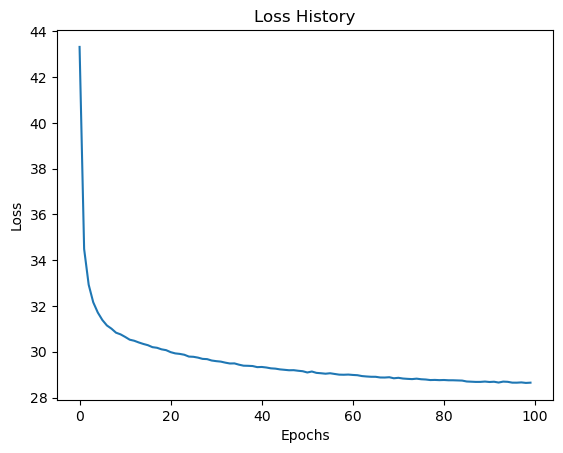

In [6]:
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(fname="./VAE_Loss.png")
plt.show()

In [7]:
torch.save(vae.state_dict(), "./models/VAE.pth")
del vae

# GAN

In [18]:
latent_dim = 100
output_dim = 784

generator = models.Generator(latent_dim, output_dim).cuda()
discriminator = models.Discriminator(output_dim).cuda()

In [19]:
criterion = nn.BCELoss()

lr = 0.0002
generator_optimizer = optim.Adam(generator.parameters(), lr=lr)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

In [22]:
def train_gan(generator, discriminator, dataloader, num_epochs, critic_iterations):
    generator.train()
    discriminator.train()
    loss_history_d, loss_history_g = [], []
    
    for epoch in range(num_epochs):
        total_loss_d, total_loss_g = 0, 0
        pbar = tqdm.tqdm(dataloader,
                         leave=True,
                         ncols=70,
                         unit='batch')
        start_time = time.time()
        for batch_id, (real_images, _) in enumerate(pbar):
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1).cuda()
            
            # Train Discrimitor
            for _ in range(critic_iterations):
                discriminator.zero_grad()
                
                # Real images
                real_labels = torch.ones(batch_size, 1).cuda()
                real_outputs = discriminator(real_images)
                real_loss = criterion(real_outputs, real_labels)
                
                # Fake images
                noise = torch.randn(batch_size, latent_dim)
                noise = noise.cuda()
                fake_images = generator(noise)
                fake_labels = torch.zeros(batch_size, 1).cuda()
                fake_outputs = discriminator(fake_images.detach())
                fake_loss = criterion(fake_outputs, fake_labels)
            
                d_loss = real_loss + fake_loss
                d_loss.backward()
                discriminator_optimizer.step()
                total_loss_d += d_loss.item()
            
            # Train Generator
            generator.zero_grad()
            fake_outputs = discriminator(fake_images)
            g_loss = criterion(fake_outputs, real_labels)
            g_loss.backward()
            generator_optimizer.step()
            
            total_loss_g += g_loss.item()
            
            pbar.set_description("Batch {}/{}".format(batch_id+1, len(dataloader)))
            
        end_time = time.time()
        loss_history_d.append(total_loss_d / len(dataloader.dataset)*critic_iterations)
        loss_history_g.append(total_loss_g / len(dataloader.dataset))
        
        print('Epoch [{}/{}], Discriminator Loss: {:.3f}, Generator Loss: {:.3f}, Time: {:.2f}s'.format(
            epoch + 1, 
            num_epochs,
            total_loss_d / len(dataloader.dataset),
            total_loss_g / len(dataloader.dataset),
            end_time - start_time))
    return loss_history_d, loss_history_g

### Instance 0
critic_iterations = 1

In [15]:
num_epochs = 100
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root='./', train=True, transform=transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
loss_history_d, loss_history_g = train_gan(generator, discriminator, dataloader, num_epochs, 1)

Batch 469/469: 100%|█████████████| 469/469 [00:30<00:00, 15.36batch/s]


Epoch [1/100], Discriminator Loss: 0.003, Generator Loss: 0.044, Time: 30.53s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.36batch/s]


Epoch [2/100], Discriminator Loss: 0.007, Generator Loss: 0.049, Time: 32.66s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.96batch/s]


Epoch [3/100], Discriminator Loss: 0.004, Generator Loss: 0.022, Time: 31.36s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.66batch/s]


Epoch [4/100], Discriminator Loss: 0.002, Generator Loss: 0.032, Time: 31.99s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 15.05batch/s]


Epoch [5/100], Discriminator Loss: 0.003, Generator Loss: 0.046, Time: 31.17s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.88batch/s]


Epoch [6/100], Discriminator Loss: 0.002, Generator Loss: 0.048, Time: 31.51s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.80batch/s]


Epoch [7/100], Discriminator Loss: 0.002, Generator Loss: 0.040, Time: 31.68s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.61batch/s]


Epoch [8/100], Discriminator Loss: 0.002, Generator Loss: 0.052, Time: 32.11s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.71batch/s]


Epoch [9/100], Discriminator Loss: 0.002, Generator Loss: 0.048, Time: 31.89s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.71batch/s]


Epoch [10/100], Discriminator Loss: 0.001, Generator Loss: 0.051, Time: 31.89s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.56batch/s]


Epoch [11/100], Discriminator Loss: 0.002, Generator Loss: 0.050, Time: 32.22s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 15.02batch/s]


Epoch [12/100], Discriminator Loss: 0.002, Generator Loss: 0.044, Time: 31.24s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.80batch/s]


Epoch [13/100], Discriminator Loss: 0.002, Generator Loss: 0.041, Time: 31.69s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.88batch/s]


Epoch [14/100], Discriminator Loss: 0.002, Generator Loss: 0.042, Time: 31.53s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.67batch/s]


Epoch [15/100], Discriminator Loss: 0.002, Generator Loss: 0.043, Time: 31.98s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.82batch/s]


Epoch [16/100], Discriminator Loss: 0.002, Generator Loss: 0.040, Time: 31.64s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 15.07batch/s]


Epoch [17/100], Discriminator Loss: 0.002, Generator Loss: 0.040, Time: 31.13s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.85batch/s]


Epoch [18/100], Discriminator Loss: 0.002, Generator Loss: 0.038, Time: 31.58s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.88batch/s]


Epoch [19/100], Discriminator Loss: 0.002, Generator Loss: 0.038, Time: 31.52s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.77batch/s]


Epoch [20/100], Discriminator Loss: 0.002, Generator Loss: 0.035, Time: 31.75s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.96batch/s]


Epoch [21/100], Discriminator Loss: 0.002, Generator Loss: 0.039, Time: 31.35s


Batch 469/469: 100%|█████████████| 469/469 [00:34<00:00, 13.69batch/s]


Epoch [22/100], Discriminator Loss: 0.002, Generator Loss: 0.038, Time: 34.25s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.75batch/s]


Epoch [23/100], Discriminator Loss: 0.002, Generator Loss: 0.037, Time: 31.80s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.89batch/s]


Epoch [24/100], Discriminator Loss: 0.002, Generator Loss: 0.033, Time: 31.50s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 15.01batch/s]


Epoch [25/100], Discriminator Loss: 0.003, Generator Loss: 0.031, Time: 31.25s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.75batch/s]


Epoch [26/100], Discriminator Loss: 0.003, Generator Loss: 0.032, Time: 31.79s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.87batch/s]


Epoch [27/100], Discriminator Loss: 0.003, Generator Loss: 0.027, Time: 31.54s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.80batch/s]


Epoch [28/100], Discriminator Loss: 0.003, Generator Loss: 0.027, Time: 31.69s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.98batch/s]


Epoch [29/100], Discriminator Loss: 0.003, Generator Loss: 0.027, Time: 31.30s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.79batch/s]


Epoch [30/100], Discriminator Loss: 0.003, Generator Loss: 0.028, Time: 31.72s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.77batch/s]


Epoch [31/100], Discriminator Loss: 0.003, Generator Loss: 0.031, Time: 31.75s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.80batch/s]


Epoch [32/100], Discriminator Loss: 0.003, Generator Loss: 0.030, Time: 31.69s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.80batch/s]


Epoch [33/100], Discriminator Loss: 0.003, Generator Loss: 0.032, Time: 31.68s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.62batch/s]


Epoch [34/100], Discriminator Loss: 0.003, Generator Loss: 0.026, Time: 32.07s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.84batch/s]


Epoch [35/100], Discriminator Loss: 0.003, Generator Loss: 0.025, Time: 31.61s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.93batch/s]


Epoch [36/100], Discriminator Loss: 0.003, Generator Loss: 0.024, Time: 31.41s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.66batch/s]


Epoch [37/100], Discriminator Loss: 0.004, Generator Loss: 0.024, Time: 32.00s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.79batch/s]


Epoch [38/100], Discriminator Loss: 0.004, Generator Loss: 0.026, Time: 31.71s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.84batch/s]


Epoch [39/100], Discriminator Loss: 0.004, Generator Loss: 0.025, Time: 31.61s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.68batch/s]


Epoch [40/100], Discriminator Loss: 0.004, Generator Loss: 0.024, Time: 31.94s


Batch 469/469: 100%|█████████████| 469/469 [00:34<00:00, 13.59batch/s]


Epoch [41/100], Discriminator Loss: 0.004, Generator Loss: 0.023, Time: 34.51s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.72batch/s]


Epoch [42/100], Discriminator Loss: 0.004, Generator Loss: 0.024, Time: 31.87s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 15.04batch/s]


Epoch [43/100], Discriminator Loss: 0.004, Generator Loss: 0.022, Time: 31.19s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.97batch/s]


Epoch [44/100], Discriminator Loss: 0.004, Generator Loss: 0.020, Time: 31.33s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.85batch/s]


Epoch [45/100], Discriminator Loss: 0.004, Generator Loss: 0.021, Time: 31.59s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.88batch/s]


Epoch [46/100], Discriminator Loss: 0.004, Generator Loss: 0.021, Time: 31.52s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 15.09batch/s]


Epoch [47/100], Discriminator Loss: 0.004, Generator Loss: 0.020, Time: 31.07s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.77batch/s]


Epoch [48/100], Discriminator Loss: 0.004, Generator Loss: 0.021, Time: 31.76s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.71batch/s]


Epoch [49/100], Discriminator Loss: 0.004, Generator Loss: 0.021, Time: 31.89s


Batch 469/469: 100%|█████████████| 469/469 [00:33<00:00, 14.01batch/s]


Epoch [50/100], Discriminator Loss: 0.004, Generator Loss: 0.019, Time: 33.48s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.22batch/s]


Epoch [51/100], Discriminator Loss: 0.004, Generator Loss: 0.020, Time: 32.97s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.21batch/s]


Epoch [52/100], Discriminator Loss: 0.004, Generator Loss: 0.019, Time: 33.00s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.80batch/s]


Epoch [53/100], Discriminator Loss: 0.005, Generator Loss: 0.019, Time: 31.70s


Batch 469/469: 100%|█████████████| 469/469 [00:33<00:00, 14.16batch/s]


Epoch [54/100], Discriminator Loss: 0.005, Generator Loss: 0.018, Time: 33.11s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.81batch/s]


Epoch [55/100], Discriminator Loss: 0.005, Generator Loss: 0.018, Time: 31.67s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.59batch/s]


Epoch [56/100], Discriminator Loss: 0.005, Generator Loss: 0.017, Time: 32.14s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.85batch/s]


Epoch [57/100], Discriminator Loss: 0.005, Generator Loss: 0.018, Time: 31.58s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.77batch/s]


Epoch [58/100], Discriminator Loss: 0.005, Generator Loss: 0.018, Time: 31.75s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.98batch/s]


Epoch [59/100], Discriminator Loss: 0.005, Generator Loss: 0.017, Time: 31.31s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.69batch/s]


Epoch [60/100], Discriminator Loss: 0.005, Generator Loss: 0.017, Time: 31.92s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.95batch/s]


Epoch [61/100], Discriminator Loss: 0.005, Generator Loss: 0.017, Time: 31.36s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 15.00batch/s]


Epoch [62/100], Discriminator Loss: 0.005, Generator Loss: 0.016, Time: 31.27s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.90batch/s]


Epoch [63/100], Discriminator Loss: 0.005, Generator Loss: 0.016, Time: 31.47s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.69batch/s]


Epoch [64/100], Discriminator Loss: 0.005, Generator Loss: 0.016, Time: 31.93s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.98batch/s]


Epoch [65/100], Discriminator Loss: 0.005, Generator Loss: 0.016, Time: 31.31s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.92batch/s]


Epoch [66/100], Discriminator Loss: 0.005, Generator Loss: 0.016, Time: 31.44s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.27batch/s]


Epoch [67/100], Discriminator Loss: 0.005, Generator Loss: 0.015, Time: 32.87s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.95batch/s]


Epoch [68/100], Discriminator Loss: 0.006, Generator Loss: 0.015, Time: 31.38s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.77batch/s]


Epoch [69/100], Discriminator Loss: 0.006, Generator Loss: 0.015, Time: 31.75s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.90batch/s]


Epoch [70/100], Discriminator Loss: 0.006, Generator Loss: 0.015, Time: 31.47s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.89batch/s]


Epoch [71/100], Discriminator Loss: 0.006, Generator Loss: 0.015, Time: 31.50s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.98batch/s]


Epoch [72/100], Discriminator Loss: 0.006, Generator Loss: 0.015, Time: 31.30s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.86batch/s]


Epoch [73/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 31.56s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.91batch/s]


Epoch [74/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 31.45s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.58batch/s]


Epoch [75/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 32.16s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.75batch/s]


Epoch [76/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 31.79s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.80batch/s]


Epoch [77/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 31.69s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.89batch/s]


Epoch [78/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 31.50s


Batch 469/469: 100%|█████████████| 469/469 [00:35<00:00, 13.40batch/s]


Epoch [79/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 35.01s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.70batch/s]


Epoch [80/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 31.90s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.93batch/s]


Epoch [81/100], Discriminator Loss: 0.006, Generator Loss: 0.014, Time: 31.42s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.65batch/s]


Epoch [82/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 32.01s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.88batch/s]


Epoch [83/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.52s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.63batch/s]


Epoch [84/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 32.07s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.86batch/s]


Epoch [85/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.56s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.66batch/s]


Epoch [86/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 32.00s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.87batch/s]


Epoch [87/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.54s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.71batch/s]


Epoch [88/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.89s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.79batch/s]


Epoch [89/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.71s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.59batch/s]


Epoch [90/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 32.14s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.81batch/s]


Epoch [91/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.67s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.74batch/s]


Epoch [92/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.82s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.82batch/s]


Epoch [93/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.65s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.57batch/s]


Epoch [94/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 32.19s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.72batch/s]


Epoch [95/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.85s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.67batch/s]


Epoch [96/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.96s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.38batch/s]


Epoch [97/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 32.61s


Batch 469/469: 100%|█████████████| 469/469 [00:32<00:00, 14.61batch/s]


Epoch [98/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 32.10s


Batch 469/469: 100%|█████████████| 469/469 [00:31<00:00, 14.66batch/s]


Epoch [99/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 31.99s


Batch 469/469: 100%|█████████████| 469/469 [00:33<00:00, 13.81batch/s]

Epoch [100/100], Discriminator Loss: 0.006, Generator Loss: 0.013, Time: 33.96s


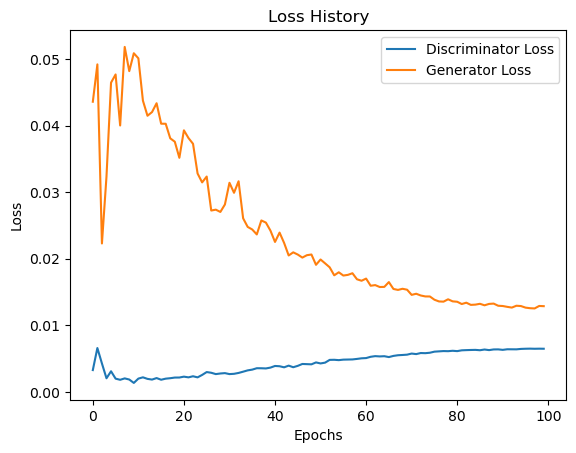

In [16]:
plt.plot(loss_history_d, label='Discriminator Loss')
plt.plot(loss_history_g, label='Generator Loss')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(fname="./GAN_Loss_critic_1.png")
plt.show()

In [17]:
torch.save(generator.state_dict(), "./models/Generator_critic_1.pth")
torch.save(discriminator.state_dict(), "./models/Descriminator_critic_1.pth")
del generator, discriminator

### Instance 1
critic_iterations = 5

In [23]:
num_epochs = 100
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root='./', train=True, transform=transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
loss_history_d, loss_history_g = train_gan(generator, discriminator, dataloader, num_epochs, 5)

Batch 469/469: 100%|█████████████| 469/469 [00:50<00:00,  9.24batch/s]


Epoch [1/100], Discriminator Loss: 0.000, Generator Loss: 0.367, Time: 50.77s


Batch 469/469: 100%|█████████████| 469/469 [00:56<00:00,  8.34batch/s]


Epoch [2/100], Discriminator Loss: 0.003, Generator Loss: 0.282, Time: 56.25s


Batch 469/469: 100%|█████████████| 469/469 [00:58<00:00,  8.02batch/s]


Epoch [3/100], Discriminator Loss: 0.004, Generator Loss: 0.055, Time: 58.48s


Batch 469/469: 100%|█████████████| 469/469 [00:59<00:00,  7.92batch/s]


Epoch [4/100], Discriminator Loss: 0.001, Generator Loss: 0.071, Time: 59.21s


Batch 469/469: 100%|█████████████| 469/469 [00:59<00:00,  7.89batch/s]


Epoch [5/100], Discriminator Loss: 0.001, Generator Loss: 0.073, Time: 59.45s


Batch 469/469: 100%|█████████████| 469/469 [00:56<00:00,  8.31batch/s]


Epoch [6/100], Discriminator Loss: 0.001, Generator Loss: 0.092, Time: 56.45s


Batch 469/469: 100%|█████████████| 469/469 [00:57<00:00,  8.12batch/s]


Epoch [7/100], Discriminator Loss: 0.000, Generator Loss: 0.087, Time: 57.76s


Batch 469/469: 100%|█████████████| 469/469 [00:58<00:00,  7.97batch/s]


Epoch [8/100], Discriminator Loss: 0.001, Generator Loss: 0.092, Time: 58.82s


Batch 469/469: 100%|█████████████| 469/469 [00:59<00:00,  7.94batch/s]


Epoch [9/100], Discriminator Loss: 0.001, Generator Loss: 0.081, Time: 59.04s


Batch 469/469: 100%|█████████████| 469/469 [00:56<00:00,  8.37batch/s]


Epoch [10/100], Discriminator Loss: 0.001, Generator Loss: 0.066, Time: 56.02s


Batch 469/469: 100%|█████████████| 469/469 [00:56<00:00,  8.24batch/s]


Epoch [11/100], Discriminator Loss: 0.001, Generator Loss: 0.063, Time: 56.93s


Batch 469/469: 100%|█████████████| 469/469 [00:57<00:00,  8.13batch/s]


Epoch [12/100], Discriminator Loss: 0.002, Generator Loss: 0.055, Time: 57.68s


Batch 469/469: 100%|█████████████| 469/469 [00:55<00:00,  8.48batch/s]


Epoch [13/100], Discriminator Loss: 0.003, Generator Loss: 0.050, Time: 55.30s


Batch 469/469: 100%|█████████████| 469/469 [00:54<00:00,  8.56batch/s]


Epoch [14/100], Discriminator Loss: 0.004, Generator Loss: 0.044, Time: 54.81s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.97batch/s]


Epoch [15/100], Discriminator Loss: 0.005, Generator Loss: 0.039, Time: 52.28s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.00batch/s]


Epoch [16/100], Discriminator Loss: 0.006, Generator Loss: 0.038, Time: 52.14s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.03batch/s]


Epoch [17/100], Discriminator Loss: 0.006, Generator Loss: 0.038, Time: 51.92s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.99batch/s]


Epoch [18/100], Discriminator Loss: 0.007, Generator Loss: 0.035, Time: 52.20s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.03batch/s]


Epoch [19/100], Discriminator Loss: 0.008, Generator Loss: 0.033, Time: 51.96s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.82batch/s]


Epoch [20/100], Discriminator Loss: 0.009, Generator Loss: 0.030, Time: 53.18s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.82batch/s]


Epoch [21/100], Discriminator Loss: 0.010, Generator Loss: 0.027, Time: 53.19s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.92batch/s]


Epoch [22/100], Discriminator Loss: 0.011, Generator Loss: 0.025, Time: 52.57s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.96batch/s]


Epoch [23/100], Discriminator Loss: 0.011, Generator Loss: 0.025, Time: 52.37s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.89batch/s]


Epoch [24/100], Discriminator Loss: 0.011, Generator Loss: 0.025, Time: 52.74s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.86batch/s]


Epoch [25/100], Discriminator Loss: 0.012, Generator Loss: 0.025, Time: 52.92s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.95batch/s]


Epoch [26/100], Discriminator Loss: 0.013, Generator Loss: 0.022, Time: 52.41s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.75batch/s]


Epoch [27/100], Discriminator Loss: 0.012, Generator Loss: 0.024, Time: 53.58s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.87batch/s]


Epoch [28/100], Discriminator Loss: 0.012, Generator Loss: 0.023, Time: 52.85s


Batch 469/469: 100%|█████████████| 469/469 [00:54<00:00,  8.61batch/s]


Epoch [29/100], Discriminator Loss: 0.013, Generator Loss: 0.022, Time: 54.48s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.03batch/s]


Epoch [30/100], Discriminator Loss: 0.014, Generator Loss: 0.021, Time: 51.92s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.03batch/s]


Epoch [31/100], Discriminator Loss: 0.013, Generator Loss: 0.021, Time: 51.95s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.94batch/s]


Epoch [32/100], Discriminator Loss: 0.014, Generator Loss: 0.021, Time: 52.45s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.90batch/s]


Epoch [33/100], Discriminator Loss: 0.014, Generator Loss: 0.021, Time: 52.69s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.05batch/s]


Epoch [34/100], Discriminator Loss: 0.014, Generator Loss: 0.021, Time: 51.82s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.97batch/s]


Epoch [35/100], Discriminator Loss: 0.014, Generator Loss: 0.021, Time: 52.28s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.07batch/s]


Epoch [36/100], Discriminator Loss: 0.014, Generator Loss: 0.022, Time: 51.72s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.96batch/s]


Epoch [37/100], Discriminator Loss: 0.015, Generator Loss: 0.021, Time: 52.36s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.02batch/s]


Epoch [38/100], Discriminator Loss: 0.015, Generator Loss: 0.020, Time: 51.97s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.97batch/s]


Epoch [39/100], Discriminator Loss: 0.015, Generator Loss: 0.020, Time: 52.29s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.01batch/s]


Epoch [40/100], Discriminator Loss: 0.015, Generator Loss: 0.021, Time: 52.07s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.78batch/s]


Epoch [41/100], Discriminator Loss: 0.015, Generator Loss: 0.021, Time: 53.45s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.95batch/s]


Epoch [42/100], Discriminator Loss: 0.015, Generator Loss: 0.020, Time: 52.41s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.01batch/s]


Epoch [43/100], Discriminator Loss: 0.015, Generator Loss: 0.020, Time: 52.08s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.84batch/s]


Epoch [44/100], Discriminator Loss: 0.015, Generator Loss: 0.021, Time: 53.05s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.74batch/s]


Epoch [45/100], Discriminator Loss: 0.015, Generator Loss: 0.021, Time: 53.64s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.04batch/s]


Epoch [46/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 51.89s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.10batch/s]


Epoch [47/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 51.56s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.89batch/s]


Epoch [48/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.74s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.92batch/s]


Epoch [49/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.55s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.85batch/s]


Epoch [50/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.98s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.95batch/s]


Epoch [51/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 52.39s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.91batch/s]


Epoch [52/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 52.62s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.00batch/s]


Epoch [53/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.14s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.00batch/s]


Epoch [54/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.10s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.97batch/s]


Epoch [55/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.30s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.87batch/s]


Epoch [56/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.87s


Batch 469/469: 100%|█████████████| 469/469 [00:54<00:00,  8.60batch/s]


Epoch [57/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 54.56s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.05batch/s]


Epoch [58/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 51.83s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.02batch/s]


Epoch [59/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 51.97s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.77batch/s]


Epoch [60/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 53.48s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.85batch/s]


Epoch [61/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.99s


Batch 469/469: 100%|█████████████| 469/469 [00:54<00:00,  8.67batch/s]


Epoch [62/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 54.12s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.99batch/s]


Epoch [63/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.15s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.96batch/s]


Epoch [64/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.37s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.98batch/s]


Epoch [65/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 52.20s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.09batch/s]


Epoch [66/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 51.57s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.99batch/s]


Epoch [67/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.20s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.97batch/s]


Epoch [68/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.29s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.86batch/s]


Epoch [69/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.94s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.09batch/s]


Epoch [70/100], Discriminator Loss: 0.017, Generator Loss: 0.020, Time: 51.59s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.05batch/s]


Epoch [71/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 51.84s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.03batch/s]


Epoch [72/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 51.96s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.99batch/s]


Epoch [73/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.20s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.93batch/s]


Epoch [74/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.50s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.86batch/s]


Epoch [75/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.92s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.80batch/s]


Epoch [76/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 53.32s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.93batch/s]


Epoch [77/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.52s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.88batch/s]


Epoch [78/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.80s


Batch 469/469: 100%|█████████████| 469/469 [00:54<00:00,  8.62batch/s]


Epoch [79/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 54.42s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.85batch/s]


Epoch [80/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 53.00s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.92batch/s]


Epoch [81/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.60s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.04batch/s]


Epoch [82/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 51.88s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.97batch/s]


Epoch [83/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.31s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.01batch/s]


Epoch [84/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.05s


Batch 469/469: 100%|█████████████| 469/469 [00:56<00:00,  8.37batch/s]


Epoch [85/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 56.06s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.01batch/s]


Epoch [86/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.08s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.03batch/s]


Epoch [87/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 51.93s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.02batch/s]


Epoch [88/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 51.99s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.99batch/s]


Epoch [89/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.18s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.98batch/s]


Epoch [90/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.20s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.94batch/s]


Epoch [91/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.45s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.05batch/s]


Epoch [92/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 51.82s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.96batch/s]


Epoch [93/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.37s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  8.94batch/s]


Epoch [94/100], Discriminator Loss: 0.017, Generator Loss: 0.019, Time: 52.45s


Batch 469/469: 100%|█████████████| 469/469 [00:52<00:00,  9.00batch/s]


Epoch [95/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 52.09s


Batch 469/469: 100%|█████████████| 469/469 [00:56<00:00,  8.25batch/s]


Epoch [96/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 56.88s


Batch 469/469: 100%|█████████████| 469/469 [00:53<00:00,  8.73batch/s]


Epoch [97/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 53.75s


Batch 469/469: 100%|█████████████| 469/469 [00:50<00:00,  9.21batch/s]


Epoch [98/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 50.92s


Batch 469/469: 100%|█████████████| 469/469 [00:50<00:00,  9.21batch/s]


Epoch [99/100], Discriminator Loss: 0.016, Generator Loss: 0.019, Time: 50.93s


Batch 469/469: 100%|█████████████| 469/469 [00:51<00:00,  9.09batch/s]

Epoch [100/100], Discriminator Loss: 0.016, Generator Loss: 0.020, Time: 51.62s


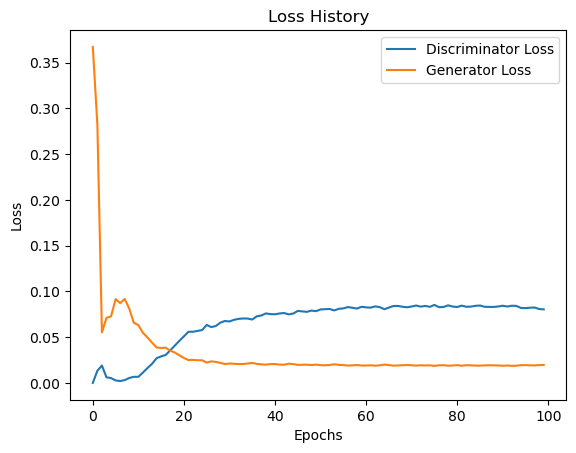

In [24]:
plt.plot(loss_history_d, label='Discriminator Loss')
plt.plot(loss_history_g, label='Generator Loss')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(fname="./GAN_Loss_critic_5.png")
plt.show()

In [25]:
torch.save(generator.state_dict(), "./models/Generator_critic_5.pth")
torch.save(discriminator.state_dict(), "./models/Descriminator_critic_5.pth")
del generator, discriminator

# WGAN

In [52]:
latent_dim = 100
output_dim = 784

generator = models.W_Generator(latent_dim, output_dim).cuda()
discriminator = models.W_Discriminator(output_dim).cuda()

In [53]:
critic_iterations = 5
clip_value = 0.01

generator_optimizer = optim.RMSprop(generator.parameters(), lr=0.00005)
discriminator_optimizer = optim.RMSprop(discriminator.parameters(), lr=0.00005)

In [42]:
def train_wgan(generator, discriminator, dataloader, num_epochs, clip_value=clip_value):
    generator.train()
    discriminator.train()
    loss_history_dr, loss_history_df, loss_history_g = [], [], []

    for epoch in range(num_epochs):
        total_loss_dr, total_loss_df, total_loss_g = 0, 0, 0
        pbar = tqdm.tqdm(dataloader,
                         leave=True,
                         ncols=70,
                         unit='batch')
        start_time = time.time()
        for i, (real_images, _) in enumerate(pbar):
            real_images = real_images.view(real_images.size(0), -1).cuda()
            
            # Train Discriminator
            for _ in range(critic_iterations):
                discriminator.zero_grad()
                
                # Real images
                real_outputs = discriminator(real_images)
                real_loss = -torch.mean(real_outputs)
                real_loss.backward()
                total_loss_dr += real_loss.item()
                
                # Fake images
                noise = torch.randn(real_images.size(0), latent_dim).cuda()
                fake_images = generator(noise)
                fake_outputs = discriminator(fake_images.detach())
                fake_loss = torch.mean(fake_outputs)
                fake_loss.backward()
                total_loss_df += fake_loss.item()
                
                discriminator_optimizer.step()
                
                # Weight clipping
                for p in discriminator.parameters():
                    p.data.clamp_(-clip_value, clip_value)
            
            # Train Generator
            generator.zero_grad()
            noise = torch.randn(real_images.size(0), latent_dim).cuda()
            fake_images = generator(noise)
            outputs = discriminator(fake_images)
            generator_loss = -torch.mean(outputs)
            generator_loss.backward()
            total_loss_g += generator_loss.item()
            generator_optimizer.step()
            
        end_time = time.time()
        loss_history_dr.append(total_loss_dr / len(dataloader.dataset))
        loss_history_df.append(total_loss_df / len(dataloader.dataset))
        loss_history_g.append(total_loss_g / len(dataloader.dataset))
        
        print('Epoch [{}/{}], Real Loss: {:.3f}, Fake Loss: {:.3f}, Generator Loss: {:.3f}, Time: {:.2f}s'.format(
            epoch + 1, 
            num_epochs,
            total_loss_dr / len(dataloader.dataset),
            total_loss_df / len(dataloader.dataset),
            total_loss_g / len(dataloader.dataset),
            end_time - start_time))
    return (loss_history_dr, loss_history_df), loss_history_g

### Instance 0
critic_iterations = 5
clipping_value = 0.01

In [6]:
num_epochs = 100
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root='./', train=True, transform=transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
(loss_history_dr, loss_history_df), loss_history_g = train_wgan(generator, discriminator, dataloader, num_epochs)

100%|████████████████████████████| 469/469 [01:00<00:00,  7.74batch/s]


Epoch [1/100], Real Loss: -0.071, Fake Loss: 0.070, Generator Loss: -0.014, Time: 60.57s


100%|████████████████████████████| 469/469 [00:59<00:00,  7.83batch/s]


Epoch [2/100], Real Loss: -0.037, Fake Loss: 0.037, Generator Loss: -0.007, Time: 59.93s


100%|████████████████████████████| 469/469 [00:58<00:00,  8.03batch/s]


Epoch [3/100], Real Loss: -0.015, Fake Loss: 0.013, Generator Loss: -0.003, Time: 58.40s


100%|████████████████████████████| 469/469 [00:58<00:00,  8.07batch/s]


Epoch [4/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 58.13s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.28batch/s]


Epoch [5/100], Real Loss: -0.010, Fake Loss: 0.008, Generator Loss: -0.001, Time: 56.66s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.24batch/s]


Epoch [6/100], Real Loss: -0.008, Fake Loss: 0.005, Generator Loss: -0.001, Time: 56.93s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.29batch/s]


Epoch [7/100], Real Loss: -0.006, Fake Loss: 0.003, Generator Loss: -0.001, Time: 56.59s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.21batch/s]


Epoch [8/100], Real Loss: -0.008, Fake Loss: 0.005, Generator Loss: -0.001, Time: 57.12s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.20batch/s]


Epoch [9/100], Real Loss: -0.008, Fake Loss: 0.005, Generator Loss: -0.001, Time: 57.17s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.17batch/s]


Epoch [10/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 57.42s


100%|████████████████████████████| 469/469 [00:59<00:00,  7.89batch/s]


Epoch [11/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 59.43s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.23batch/s]


Epoch [12/100], Real Loss: -0.009, Fake Loss: 0.006, Generator Loss: -0.001, Time: 57.01s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.13batch/s]


Epoch [13/100], Real Loss: -0.007, Fake Loss: 0.005, Generator Loss: -0.001, Time: 57.71s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.28batch/s]


Epoch [14/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.66s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.26batch/s]


Epoch [15/100], Real Loss: -0.007, Fake Loss: 0.005, Generator Loss: -0.001, Time: 56.81s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.27batch/s]


Epoch [16/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.74s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.22batch/s]


Epoch [17/100], Real Loss: -0.007, Fake Loss: 0.005, Generator Loss: -0.001, Time: 57.03s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.25batch/s]


Epoch [18/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 56.85s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.22batch/s]


Epoch [19/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 57.03s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.29batch/s]


Epoch [20/100], Real Loss: -0.010, Fake Loss: 0.008, Generator Loss: -0.002, Time: 56.60s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.21batch/s]


Epoch [21/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 57.14s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.20batch/s]


Epoch [22/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 57.17s


100%|████████████████████████████| 469/469 [00:58<00:00,  8.06batch/s]


Epoch [23/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 58.22s


100%|████████████████████████████| 469/469 [00:58<00:00,  7.98batch/s]


Epoch [24/100], Real Loss: -0.009, Fake Loss: 0.008, Generator Loss: -0.002, Time: 58.81s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.27batch/s]


Epoch [25/100], Real Loss: -0.007, Fake Loss: 0.005, Generator Loss: -0.001, Time: 56.70s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.25batch/s]


Epoch [26/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 56.82s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.24batch/s]


Epoch [27/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 56.90s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.25batch/s]


Epoch [28/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.83s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.16batch/s]


Epoch [29/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 57.45s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.23batch/s]


Epoch [30/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 56.99s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.31batch/s]


Epoch [31/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.41s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.18batch/s]


Epoch [32/100], Real Loss: -0.008, Fake Loss: 0.007, Generator Loss: -0.001, Time: 57.35s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.30batch/s]


Epoch [33/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.52s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.25batch/s]


Epoch [34/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.86s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.32batch/s]


Epoch [35/100], Real Loss: -0.008, Fake Loss: 0.006, Generator Loss: -0.001, Time: 56.34s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.31batch/s]


Epoch [36/100], Real Loss: -0.011, Fake Loss: 0.009, Generator Loss: -0.002, Time: 56.46s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.24batch/s]


Epoch [37/100], Real Loss: -0.008, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.89s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.28batch/s]


Epoch [38/100], Real Loss: -0.009, Fake Loss: 0.008, Generator Loss: -0.002, Time: 56.63s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.20batch/s]


Epoch [39/100], Real Loss: -0.009, Fake Loss: 0.008, Generator Loss: -0.001, Time: 57.19s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.23batch/s]


Epoch [40/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.98s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.27batch/s]


Epoch [41/100], Real Loss: -0.007, Fake Loss: 0.006, Generator Loss: -0.001, Time: 56.70s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.23batch/s]


Epoch [42/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 56.98s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.21batch/s]


Epoch [43/100], Real Loss: -0.009, Fake Loss: 0.008, Generator Loss: -0.002, Time: 57.11s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.09batch/s]


Epoch [44/100], Real Loss: -0.009, Fake Loss: 0.007, Generator Loss: -0.001, Time: 57.98s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.09batch/s]


Epoch [45/100], Real Loss: -0.006, Fake Loss: 0.005, Generator Loss: -0.001, Time: 57.96s


100%|████████████████████████████| 469/469 [00:57<00:00,  8.12batch/s]


Epoch [46/100], Real Loss: -0.005, Fake Loss: 0.003, Generator Loss: -0.001, Time: 57.76s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.29batch/s]


Epoch [47/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 56.55s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.37batch/s]


Epoch [48/100], Real Loss: -0.003, Fake Loss: 0.001, Generator Loss: -0.000, Time: 56.03s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.23batch/s]


Epoch [49/100], Real Loss: -0.003, Fake Loss: 0.000, Generator Loss: -0.000, Time: 56.96s


100%|████████████████████████████| 469/469 [00:58<00:00,  8.03batch/s]


Epoch [50/100], Real Loss: -0.003, Fake Loss: -0.000, Generator Loss: 0.000, Time: 58.44s


100%|████████████████████████████| 469/469 [00:45<00:00, 10.29batch/s]


Epoch [51/100], Real Loss: -0.003, Fake Loss: -0.001, Generator Loss: 0.000, Time: 45.60s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.35batch/s]


Epoch [52/100], Real Loss: -0.003, Fake Loss: -0.000, Generator Loss: 0.000, Time: 37.97s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.08batch/s]


Epoch [53/100], Real Loss: -0.003, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.81s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.32batch/s]


Epoch [54/100], Real Loss: -0.004, Fake Loss: 0.001, Generator Loss: -0.000, Time: 38.07s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.45batch/s]


Epoch [55/100], Real Loss: -0.003, Fake Loss: 0.001, Generator Loss: -0.000, Time: 37.68s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.30batch/s]


Epoch [56/100], Real Loss: -0.004, Fake Loss: 0.001, Generator Loss: -0.000, Time: 38.13s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.22batch/s]


Epoch [57/100], Real Loss: -0.004, Fake Loss: 0.001, Generator Loss: -0.000, Time: 38.38s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.27batch/s]


Epoch [58/100], Real Loss: -0.004, Fake Loss: 0.001, Generator Loss: -0.000, Time: 38.23s


100%|████████████████████████████| 469/469 [00:53<00:00,  8.73batch/s]


Epoch [59/100], Real Loss: -0.004, Fake Loss: 0.001, Generator Loss: -0.000, Time: 53.75s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.49batch/s]


Epoch [60/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 40.82s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.12batch/s]


Epoch [61/100], Real Loss: -0.005, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.70s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.20batch/s]


Epoch [62/100], Real Loss: -0.005, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.44s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.45batch/s]


Epoch [63/100], Real Loss: -0.005, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.67s


100%|████████████████████████████| 469/469 [00:42<00:00, 11.00batch/s]


Epoch [64/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 42.63s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.43batch/s]


Epoch [65/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.72s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.24batch/s]


Epoch [66/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.33s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.21batch/s]


Epoch [67/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.41s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.42batch/s]


Epoch [68/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.75s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.22batch/s]


Epoch [69/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.37s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.40batch/s]


Epoch [70/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.84s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.36batch/s]


Epoch [71/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.94s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.34batch/s]


Epoch [72/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.01s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.14batch/s]


Epoch [73/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.62s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.19batch/s]


Epoch [74/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.49s


100%|████████████████████████████| 469/469 [00:41<00:00, 11.21batch/s]


Epoch [75/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 41.83s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.25batch/s]


Epoch [76/100], Real Loss: -0.005, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.29s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.22batch/s]


Epoch [77/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.37s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.23batch/s]


Epoch [78/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.34s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.37batch/s]


Epoch [79/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.90s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.28batch/s]


Epoch [80/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.20s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.24batch/s]


Epoch [81/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.32s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.32batch/s]


Epoch [82/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.07s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.32batch/s]


Epoch [83/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.07s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.20batch/s]


Epoch [84/100], Real Loss: -0.004, Fake Loss: 0.003, Generator Loss: -0.001, Time: 38.46s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.26batch/s]


Epoch [85/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.27s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.37batch/s]


Epoch [86/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.92s


100%|████████████████████████████| 469/469 [00:41<00:00, 11.40batch/s]


Epoch [87/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 41.14s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.27batch/s]


Epoch [88/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.21s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.41batch/s]


Epoch [89/100], Real Loss: -0.005, Fake Loss: 0.003, Generator Loss: -0.001, Time: 37.80s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.31batch/s]


Epoch [90/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.11s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.27batch/s]


Epoch [91/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.22s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.41batch/s]


Epoch [92/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.78s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.31batch/s]


Epoch [93/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.11s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.37batch/s]


Epoch [94/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.91s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.33batch/s]


Epoch [95/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.03s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.36batch/s]


Epoch [96/100], Real Loss: -0.004, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.95s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.12batch/s]


Epoch [97/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.70s


100%|████████████████████████████| 469/469 [00:41<00:00, 11.41batch/s]


Epoch [98/100], Real Loss: -0.003, Fake Loss: 0.001, Generator Loss: -0.000, Time: 41.12s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.23batch/s]


Epoch [99/100], Real Loss: -0.003, Fake Loss: 0.001, Generator Loss: -0.000, Time: 38.35s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.32batch/s]

Epoch [100/100], Real Loss: -0.003, Fake Loss: 0.001, Generator Loss: -0.000, Time: 38.07s


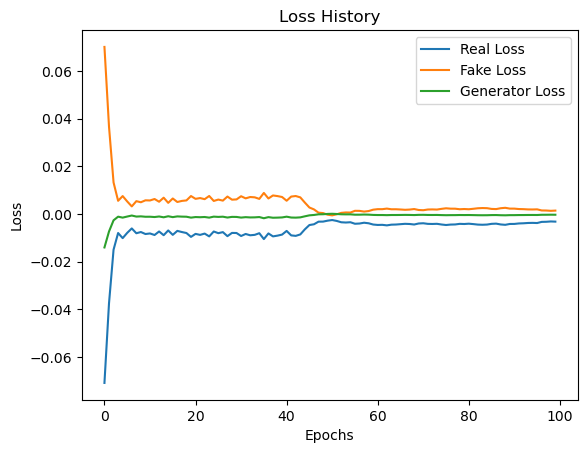

In [7]:
plt.plot(loss_history_dr, label='Real Loss')
plt.plot(loss_history_df, label='Fake Loss')
plt.plot(loss_history_g, label='Generator Loss')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(fname="./WGAN_Loss_critic_5.png")
plt.show()

In [8]:
torch.save(generator.state_dict(), "./models/W_Generator_critic_5.pth")
torch.save(discriminator.state_dict(), "./models/W_Descriminator_critic_5.pth")
del generator, discriminator

### Instance 1
critic_iterations = 5
clipping_value = 0.1

In [5]:
num_epochs = 100
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root='./', train=True, transform=transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
(loss_history_dr, loss_history_df), loss_history_g = train_wgan(generator, discriminator, dataloader, num_epochs, clip_value=0.1)

100%|████████████████████████████| 469/469 [00:24<00:00, 18.79batch/s]


Epoch [1/100], Real Loss: -21.652, Fake Loss: 21.089, Generator Loss: -4.225, Time: 24.96s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.85batch/s]


Epoch [2/100], Real Loss: -38.429, Fake Loss: 37.777, Generator Loss: -7.554, Time: 39.56s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.18batch/s]


Epoch [3/100], Real Loss: -31.806, Fake Loss: 31.220, Generator Loss: -6.231, Time: 35.57s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.25batch/s]


Epoch [4/100], Real Loss: -19.874, Fake Loss: 18.860, Generator Loss: -3.766, Time: 35.40s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.86batch/s]


Epoch [5/100], Real Loss: -8.324, Fake Loss: 5.884, Generator Loss: -1.161, Time: 33.83s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.73batch/s]


Epoch [6/100], Real Loss: -12.475, Fake Loss: 9.177, Generator Loss: -1.813, Time: 34.16s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.89batch/s]


Epoch [7/100], Real Loss: -20.938, Fake Loss: 18.131, Generator Loss: -3.604, Time: 33.78s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.65batch/s]


Epoch [8/100], Real Loss: -32.120, Fake Loss: 26.481, Generator Loss: -5.289, Time: 37.08s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.73batch/s]


Epoch [9/100], Real Loss: -41.638, Fake Loss: 35.705, Generator Loss: -7.118, Time: 34.17s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.85batch/s]


Epoch [10/100], Real Loss: -37.462, Fake Loss: 32.354, Generator Loss: -6.440, Time: 33.86s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.65batch/s]


Epoch [11/100], Real Loss: -34.361, Fake Loss: 28.518, Generator Loss: -5.670, Time: 34.36s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.81batch/s]


Epoch [12/100], Real Loss: -29.613, Fake Loss: 23.712, Generator Loss: -4.704, Time: 33.97s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.65batch/s]


Epoch [13/100], Real Loss: -23.426, Fake Loss: 18.069, Generator Loss: -3.558, Time: 34.36s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.71batch/s]


Epoch [14/100], Real Loss: -22.362, Fake Loss: 14.721, Generator Loss: -2.900, Time: 34.20s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.74batch/s]


Epoch [15/100], Real Loss: -18.572, Fake Loss: 14.183, Generator Loss: -2.797, Time: 34.15s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.81batch/s]


Epoch [16/100], Real Loss: -18.754, Fake Loss: 14.207, Generator Loss: -2.792, Time: 33.97s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.20batch/s]


Epoch [17/100], Real Loss: -16.557, Fake Loss: 12.293, Generator Loss: -2.421, Time: 35.53s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.67batch/s]


Epoch [18/100], Real Loss: -15.348, Fake Loss: 10.123, Generator Loss: -1.976, Time: 37.00s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.94batch/s]


Epoch [19/100], Real Loss: -16.585, Fake Loss: 12.089, Generator Loss: -2.366, Time: 36.26s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.21batch/s]


Epoch [20/100], Real Loss: -12.262, Fake Loss: 6.641, Generator Loss: -1.282, Time: 33.00s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.27batch/s]


Epoch [21/100], Real Loss: -15.332, Fake Loss: 10.073, Generator Loss: -1.969, Time: 32.86s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.97batch/s]


Epoch [22/100], Real Loss: -11.028, Fake Loss: 6.678, Generator Loss: -1.278, Time: 33.57s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.20batch/s]


Epoch [23/100], Real Loss: -10.154, Fake Loss: 5.435, Generator Loss: -1.042, Time: 33.02s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.40batch/s]


Epoch [24/100], Real Loss: -13.933, Fake Loss: 9.920, Generator Loss: -1.932, Time: 32.56s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.97batch/s]


Epoch [25/100], Real Loss: -11.429, Fake Loss: 8.224, Generator Loss: -1.595, Time: 33.57s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.22batch/s]


Epoch [26/100], Real Loss: -15.529, Fake Loss: 11.936, Generator Loss: -2.338, Time: 32.99s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.38batch/s]


Epoch [27/100], Real Loss: -15.201, Fake Loss: 12.700, Generator Loss: -2.481, Time: 32.61s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.18batch/s]


Epoch [28/100], Real Loss: -20.209, Fake Loss: 18.299, Generator Loss: -3.612, Time: 33.09s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.35batch/s]


Epoch [29/100], Real Loss: -16.232, Fake Loss: 13.672, Generator Loss: -2.682, Time: 37.98s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.19batch/s]


Epoch [30/100], Real Loss: -16.921, Fake Loss: 13.956, Generator Loss: -2.734, Time: 35.56s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.92batch/s]


Epoch [31/100], Real Loss: -14.080, Fake Loss: 11.415, Generator Loss: -2.231, Time: 36.31s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.70batch/s]


Epoch [32/100], Real Loss: -16.185, Fake Loss: 13.357, Generator Loss: -2.616, Time: 34.24s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.62batch/s]


Epoch [33/100], Real Loss: -20.860, Fake Loss: 18.813, Generator Loss: -3.720, Time: 34.43s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.75batch/s]


Epoch [34/100], Real Loss: -26.507, Fake Loss: 24.510, Generator Loss: -4.858, Time: 36.80s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.72batch/s]


Epoch [35/100], Real Loss: -24.840, Fake Loss: 22.972, Generator Loss: -4.537, Time: 34.17s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.51batch/s]


Epoch [36/100], Real Loss: -23.701, Fake Loss: 21.283, Generator Loss: -4.204, Time: 34.71s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.73batch/s]


Epoch [37/100], Real Loss: -19.258, Fake Loss: 16.482, Generator Loss: -3.245, Time: 34.15s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.99batch/s]


Epoch [38/100], Real Loss: -19.355, Fake Loss: 16.777, Generator Loss: -3.304, Time: 33.52s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.50batch/s]


Epoch [39/100], Real Loss: -19.730, Fake Loss: 16.976, Generator Loss: -3.350, Time: 34.75s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.79batch/s]


Epoch [40/100], Real Loss: -19.863, Fake Loss: 17.554, Generator Loss: -3.460, Time: 34.01s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.76batch/s]


Epoch [41/100], Real Loss: -16.303, Fake Loss: 13.504, Generator Loss: -2.655, Time: 34.09s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.76batch/s]


Epoch [42/100], Real Loss: -17.399, Fake Loss: 14.688, Generator Loss: -2.895, Time: 34.09s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.55batch/s]


Epoch [43/100], Real Loss: -17.818, Fake Loss: 15.862, Generator Loss: -3.126, Time: 34.60s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.48batch/s]


Epoch [44/100], Real Loss: -18.797, Fake Loss: 16.539, Generator Loss: -3.272, Time: 34.78s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.71batch/s]


Epoch [45/100], Real Loss: -18.341, Fake Loss: 16.001, Generator Loss: -3.155, Time: 34.20s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.71batch/s]


Epoch [46/100], Real Loss: -16.726, Fake Loss: 13.625, Generator Loss: -2.681, Time: 34.22s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.12batch/s]


Epoch [47/100], Real Loss: -16.110, Fake Loss: 13.289, Generator Loss: -2.618, Time: 35.76s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.27batch/s]


Epoch [48/100], Real Loss: -15.036, Fake Loss: 11.894, Generator Loss: -2.337, Time: 38.23s


100%|████████████████████████████| 469/469 [00:44<00:00, 10.55batch/s]


Epoch [49/100], Real Loss: -17.382, Fake Loss: 14.958, Generator Loss: -2.946, Time: 44.46s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.35batch/s]


Epoch [50/100], Real Loss: -16.834, Fake Loss: 14.405, Generator Loss: -2.834, Time: 37.99s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.63batch/s]


Epoch [51/100], Real Loss: -14.566, Fake Loss: 11.732, Generator Loss: -2.303, Time: 40.33s


100%|████████████████████████████| 469/469 [00:49<00:00,  9.54batch/s]


Epoch [52/100], Real Loss: -14.647, Fake Loss: 12.039, Generator Loss: -2.365, Time: 49.18s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.96batch/s]


Epoch [53/100], Real Loss: -14.717, Fake Loss: 12.207, Generator Loss: -2.395, Time: 39.21s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.45batch/s]


Epoch [54/100], Real Loss: -16.960, Fake Loss: 15.081, Generator Loss: -2.973, Time: 37.68s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.15batch/s]


Epoch [55/100], Real Loss: -14.387, Fake Loss: 12.078, Generator Loss: -2.375, Time: 38.61s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.15batch/s]


Epoch [56/100], Real Loss: -15.164, Fake Loss: 12.909, Generator Loss: -2.541, Time: 35.66s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.85batch/s]


Epoch [57/100], Real Loss: -15.428, Fake Loss: 13.216, Generator Loss: -2.603, Time: 33.86s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.15batch/s]


Epoch [58/100], Real Loss: -12.679, Fake Loss: 10.437, Generator Loss: -2.046, Time: 35.67s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.17batch/s]


Epoch [59/100], Real Loss: -16.336, Fake Loss: 14.442, Generator Loss: -2.849, Time: 33.09s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.90batch/s]


Epoch [60/100], Real Loss: -13.165, Fake Loss: 10.585, Generator Loss: -2.079, Time: 33.75s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.39batch/s]


Epoch [61/100], Real Loss: -11.593, Fake Loss: 9.310, Generator Loss: -1.821, Time: 32.59s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.34batch/s]


Epoch [62/100], Real Loss: -11.628, Fake Loss: 8.716, Generator Loss: -1.708, Time: 35.17s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.04batch/s]


Epoch [63/100], Real Loss: -14.700, Fake Loss: 12.399, Generator Loss: -2.440, Time: 35.96s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.13batch/s]


Epoch [64/100], Real Loss: -12.703, Fake Loss: 10.228, Generator Loss: -2.007, Time: 35.73s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.34batch/s]


Epoch [65/100], Real Loss: -12.204, Fake Loss: 9.852, Generator Loss: -1.933, Time: 38.01s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.01batch/s]


Epoch [66/100], Real Loss: -13.094, Fake Loss: 10.784, Generator Loss: -2.116, Time: 33.47s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.65batch/s]


Epoch [67/100], Real Loss: -14.055, Fake Loss: 12.135, Generator Loss: -2.381, Time: 34.36s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.74batch/s]


Epoch [68/100], Real Loss: -10.921, Fake Loss: 8.630, Generator Loss: -1.691, Time: 34.14s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.02batch/s]


Epoch [69/100], Real Loss: -10.484, Fake Loss: 8.566, Generator Loss: -1.675, Time: 33.45s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.21batch/s]


Epoch [70/100], Real Loss: -11.616, Fake Loss: 9.596, Generator Loss: -1.884, Time: 33.01s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.61batch/s]


Epoch [71/100], Real Loss: -11.364, Fake Loss: 9.302, Generator Loss: -1.822, Time: 34.46s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.62batch/s]


Epoch [72/100], Real Loss: -12.055, Fake Loss: 10.065, Generator Loss: -1.980, Time: 34.45s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.27batch/s]


Epoch [73/100], Real Loss: -11.782, Fake Loss: 9.713, Generator Loss: -1.902, Time: 35.33s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.16batch/s]


Epoch [74/100], Real Loss: -9.210, Fake Loss: 7.249, Generator Loss: -1.414, Time: 35.63s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.28batch/s]


Epoch [75/100], Real Loss: -8.232, Fake Loss: 6.356, Generator Loss: -1.231, Time: 35.32s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.84batch/s]


Epoch [76/100], Real Loss: -7.493, Fake Loss: 5.467, Generator Loss: -1.054, Time: 36.54s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.34batch/s]


Epoch [77/100], Real Loss: -8.275, Fake Loss: 6.412, Generator Loss: -1.246, Time: 35.17s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.73batch/s]


Epoch [78/100], Real Loss: -7.442, Fake Loss: 5.613, Generator Loss: -1.086, Time: 34.16s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.48batch/s]


Epoch [79/100], Real Loss: -8.970, Fake Loss: 7.069, Generator Loss: -1.377, Time: 37.59s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.57batch/s]


Epoch [80/100], Real Loss: -9.409, Fake Loss: 7.599, Generator Loss: -1.481, Time: 34.55s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.50batch/s]


Epoch [81/100], Real Loss: -9.209, Fake Loss: 7.452, Generator Loss: -1.455, Time: 34.73s


100%|████████████████████████████| 469/469 [00:36<00:00, 13.00batch/s]


Epoch [82/100], Real Loss: -8.796, Fake Loss: 7.084, Generator Loss: -1.382, Time: 36.07s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.50batch/s]


Epoch [83/100], Real Loss: -8.087, Fake Loss: 6.179, Generator Loss: -1.201, Time: 34.74s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.27batch/s]


Epoch [84/100], Real Loss: -9.126, Fake Loss: 7.254, Generator Loss: -1.414, Time: 35.35s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.30batch/s]


Epoch [85/100], Real Loss: -7.541, Fake Loss: 5.844, Generator Loss: -1.135, Time: 35.26s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.99batch/s]


Epoch [86/100], Real Loss: -8.373, Fake Loss: 6.531, Generator Loss: -1.271, Time: 36.10s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.83batch/s]


Epoch [87/100], Real Loss: -10.512, Fake Loss: 8.728, Generator Loss: -1.711, Time: 33.91s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.88batch/s]


Epoch [88/100], Real Loss: -10.460, Fake Loss: 8.817, Generator Loss: -1.732, Time: 33.80s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.29batch/s]


Epoch [89/100], Real Loss: -9.817, Fake Loss: 8.169, Generator Loss: -1.600, Time: 35.31s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.92batch/s]


Epoch [90/100], Real Loss: -10.887, Fake Loss: 9.601, Generator Loss: -1.887, Time: 36.30s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.27batch/s]


Epoch [91/100], Real Loss: -10.565, Fake Loss: 9.180, Generator Loss: -1.799, Time: 35.35s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.52batch/s]


Epoch [92/100], Real Loss: -8.474, Fake Loss: 7.095, Generator Loss: -1.386, Time: 37.45s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.37batch/s]


Epoch [93/100], Real Loss: -8.432, Fake Loss: 6.759, Generator Loss: -1.317, Time: 37.92s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.80batch/s]


Epoch [94/100], Real Loss: -8.510, Fake Loss: 6.995, Generator Loss: -1.363, Time: 33.98s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.08batch/s]


Epoch [95/100], Real Loss: -7.802, Fake Loss: 6.122, Generator Loss: -1.190, Time: 33.31s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.02batch/s]


Epoch [96/100], Real Loss: -10.443, Fake Loss: 9.061, Generator Loss: -1.780, Time: 33.45s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.90batch/s]


Epoch [97/100], Real Loss: -9.004, Fake Loss: 7.702, Generator Loss: -1.503, Time: 33.75s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.34batch/s]


Epoch [98/100], Real Loss: -9.015, Fake Loss: 7.417, Generator Loss: -1.452, Time: 32.70s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.27batch/s]


Epoch [99/100], Real Loss: -8.548, Fake Loss: 7.307, Generator Loss: -1.423, Time: 32.86s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.00batch/s]

Epoch [100/100], Real Loss: -8.107, Fake Loss: 6.942, Generator Loss: -1.357, Time: 33.49s


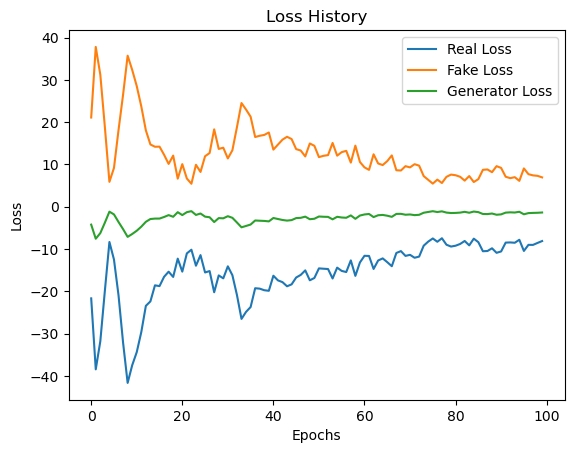

In [6]:
plt.plot(loss_history_dr, label='Real Loss')
plt.plot(loss_history_df, label='Fake Loss')
plt.plot(loss_history_g, label='Generator Loss')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(fname="./WGAN_Loss_Bigger_Window_critic_5.png")
plt.show()

In [7]:
torch.save(generator.state_dict(), "./models/W_Generator_Bigger_Window_critic_5.pth")
torch.save(discriminator.state_dict(), "./models/W_Descriminator_Bigger_Window_critic_5.pth")
del generator, discriminator

### Instance 2
critic_iterations = 5
clipping_value = 0.005

In [20]:
num_epochs = 100
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root='./', train=True, transform=transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
(loss_history_dr, loss_history_df), loss_history_g = train_wgan(generator, discriminator, dataloader, num_epochs, clip_value=0.005)

100%|████████████████████████████| 469/469 [00:59<00:00,  7.88batch/s]


Epoch [1/100], Real Loss: -0.018, Fake Loss: 0.016, Generator Loss: -0.003, Time: 59.50s


100%|████████████████████████████| 469/469 [01:02<00:00,  7.47batch/s]


Epoch [2/100], Real Loss: -0.000, Fake Loss: -0.001, Generator Loss: 0.000, Time: 62.80s


100%|████████████████████████████| 469/469 [01:01<00:00,  7.58batch/s]


Epoch [3/100], Real Loss: -0.001, Fake Loss: -0.000, Generator Loss: 0.000, Time: 61.91s


100%|████████████████████████████| 469/469 [01:01<00:00,  7.66batch/s]


Epoch [4/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 61.22s


100%|████████████████████████████| 469/469 [01:02<00:00,  7.46batch/s]


Epoch [5/100], Real Loss: -0.001, Fake Loss: 0.001, Generator Loss: -0.000, Time: 62.85s


100%|████████████████████████████| 469/469 [01:02<00:00,  7.56batch/s]


Epoch [6/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 62.02s


100%|████████████████████████████| 469/469 [01:01<00:00,  7.60batch/s]


Epoch [7/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 61.67s


100%|████████████████████████████| 469/469 [01:01<00:00,  7.68batch/s]


Epoch [8/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 61.06s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.25batch/s]


Epoch [9/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 56.86s


100%|████████████████████████████| 469/469 [00:52<00:00,  8.94batch/s]


Epoch [10/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.49s


100%|████████████████████████████| 469/469 [00:51<00:00,  9.04batch/s]


Epoch [11/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 51.86s


100%|████████████████████████████| 469/469 [00:53<00:00,  8.79batch/s]


Epoch [12/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 53.37s


100%|████████████████████████████| 469/469 [00:55<00:00,  8.52batch/s]


Epoch [13/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 55.05s


100%|████████████████████████████| 469/469 [00:56<00:00,  8.33batch/s]


Epoch [14/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 56.31s


100%|████████████████████████████| 469/469 [00:53<00:00,  8.77batch/s]


Epoch [15/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 53.47s


100%|████████████████████████████| 469/469 [00:52<00:00,  8.85batch/s]


Epoch [16/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.98s


100%|████████████████████████████| 469/469 [00:52<00:00,  9.00batch/s]


Epoch [17/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.09s


100%|████████████████████████████| 469/469 [00:50<00:00,  9.36batch/s]


Epoch [18/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 50.09s


100%|████████████████████████████| 469/469 [00:49<00:00,  9.48batch/s]


Epoch [19/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 49.45s


100%|████████████████████████████| 469/469 [00:53<00:00,  8.71batch/s]


Epoch [20/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 53.83s


100%|████████████████████████████| 469/469 [00:52<00:00,  9.00batch/s]


Epoch [21/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.10s


100%|████████████████████████████| 469/469 [00:49<00:00,  9.49batch/s]


Epoch [22/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 49.42s


100%|████████████████████████████| 469/469 [00:50<00:00,  9.37batch/s]


Epoch [23/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 50.07s


100%|████████████████████████████| 469/469 [00:53<00:00,  8.84batch/s]


Epoch [24/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 53.08s


100%|████████████████████████████| 469/469 [00:53<00:00,  8.82batch/s]


Epoch [25/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 53.15s


100%|████████████████████████████| 469/469 [00:52<00:00,  9.01batch/s]


Epoch [26/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.05s


100%|████████████████████████████| 469/469 [00:53<00:00,  8.71batch/s]


Epoch [27/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 53.86s


100%|████████████████████████████| 469/469 [00:52<00:00,  8.98batch/s]


Epoch [28/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.22s


100%|████████████████████████████| 469/469 [00:52<00:00,  8.90batch/s]


Epoch [29/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.70s


100%|████████████████████████████| 469/469 [00:51<00:00,  9.04batch/s]


Epoch [30/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 51.86s


100%|████████████████████████████| 469/469 [00:52<00:00,  8.98batch/s]


Epoch [31/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 52.21s


100%|████████████████████████████| 469/469 [00:50<00:00,  9.26batch/s]


Epoch [32/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 50.66s


100%|████████████████████████████| 469/469 [00:50<00:00,  9.36batch/s]


Epoch [33/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 50.13s


100%|████████████████████████████| 469/469 [00:50<00:00,  9.33batch/s]


Epoch [34/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 50.27s


100%|████████████████████████████| 469/469 [00:51<00:00,  9.11batch/s]


Epoch [35/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 51.50s


100%|████████████████████████████| 469/469 [00:54<00:00,  8.68batch/s]


Epoch [36/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 54.02s


100%|████████████████████████████| 469/469 [00:36<00:00, 13.03batch/s]


Epoch [37/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.01s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.18batch/s]


Epoch [38/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 35.58s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.51batch/s]


Epoch [39/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 40.73s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.86batch/s]


Epoch [40/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.56s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.97batch/s]


Epoch [41/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.17s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.79batch/s]


Epoch [42/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.68s


100%|████████████████████████████| 469/469 [00:36<00:00, 13.02batch/s]


Epoch [43/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.03s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.68batch/s]


Epoch [44/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.99s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.74batch/s]


Epoch [45/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.83s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.51batch/s]


Epoch [46/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.50s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.76batch/s]


Epoch [47/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.74s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.81batch/s]


Epoch [48/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.62s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.66batch/s]


Epoch [49/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.04s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.78batch/s]


Epoch [50/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.69s


100%|████████████████████████████| 469/469 [00:42<00:00, 10.91batch/s]


Epoch [51/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 42.97s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.69batch/s]


Epoch [52/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.95s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.80batch/s]


Epoch [53/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.63s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.81batch/s]


Epoch [54/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.61s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.70batch/s]


Epoch [55/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.93s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.30batch/s]


Epoch [56/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.12s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.82batch/s]


Epoch [57/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.58s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.38batch/s]


Epoch [58/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.87s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.15batch/s]


Epoch [59/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.60s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.69batch/s]


Epoch [60/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.97s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.37batch/s]


Epoch [61/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.90s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.68batch/s]


Epoch [62/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 40.15s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.50batch/s]


Epoch [63/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.51s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.38batch/s]


Epoch [64/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.90s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.03batch/s]


Epoch [65/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.98s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.23batch/s]


Epoch [66/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.35s


100%|████████████████████████████| 469/469 [00:39<00:00, 12.02batch/s]


Epoch [67/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.01s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.18batch/s]


Epoch [68/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.52s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.06batch/s]


Epoch [69/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.88s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.42batch/s]


Epoch [70/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.76s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.74batch/s]


Epoch [71/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.94s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.81batch/s]


Epoch [72/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.73s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.92batch/s]


Epoch [73/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.33s


100%|████████████████████████████| 469/469 [00:42<00:00, 11.10batch/s]


Epoch [74/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 42.25s


100%|████████████████████████████| 469/469 [00:41<00:00, 11.18batch/s]


Epoch [75/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 41.96s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.10batch/s]


Epoch [76/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.77s


100%|████████████████████████████| 469/469 [00:42<00:00, 11.07batch/s]


Epoch [77/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 42.36s


100%|████████████████████████████| 469/469 [00:39<00:00, 12.00batch/s]


Epoch [78/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.07s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.50batch/s]


Epoch [79/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 40.80s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.89batch/s]


Epoch [80/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.45s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.18batch/s]


Epoch [81/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.50s


100%|████████████████████████████| 469/469 [00:41<00:00, 11.33batch/s]


Epoch [82/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 41.40s


100%|████████████████████████████| 469/469 [00:41<00:00, 11.34batch/s]


Epoch [83/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 41.36s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.83batch/s]


Epoch [84/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.65s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.80batch/s]


Epoch [85/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.75s


100%|████████████████████████████| 469/469 [00:42<00:00, 11.10batch/s]


Epoch [86/100], Real Loss: -0.001, Fake Loss: 0.001, Generator Loss: -0.000, Time: 42.27s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.89batch/s]


Epoch [87/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.000, Time: 39.43s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.60batch/s]


Epoch [88/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.000, Time: 37.22s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.64batch/s]


Epoch [89/100], Real Loss: -0.002, Fake Loss: 0.002, Generator Loss: -0.000, Time: 40.30s


100%|████████████████████████████| 469/469 [00:41<00:00, 11.35batch/s]


Epoch [90/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.000, Time: 41.32s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.09batch/s]


Epoch [91/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.000, Time: 38.81s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.92batch/s]


Epoch [92/100], Real Loss: -0.002, Fake Loss: 0.002, Generator Loss: -0.000, Time: 39.34s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.47batch/s]


Epoch [93/100], Real Loss: -0.002, Fake Loss: 0.002, Generator Loss: -0.000, Time: 40.89s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.83batch/s]


Epoch [94/100], Real Loss: -0.002, Fake Loss: 0.002, Generator Loss: -0.000, Time: 39.65s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.42batch/s]


Epoch [95/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.000, Time: 37.77s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.49batch/s]


Epoch [96/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.000, Time: 40.81s


100%|████████████████████████████| 469/469 [00:43<00:00, 10.74batch/s]


Epoch [97/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.000, Time: 43.65s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.66batch/s]


Epoch [98/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.000, Time: 37.05s


100%|████████████████████████████| 469/469 [00:42<00:00, 11.07batch/s]


Epoch [99/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.000, Time: 42.36s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.88batch/s]

Epoch [100/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.000, Time: 39.49s


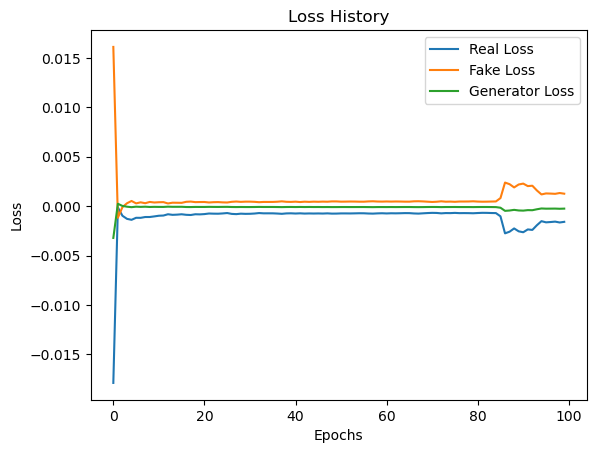

In [21]:
plt.plot(loss_history_dr, label='Real Loss')
plt.plot(loss_history_df, label='Fake Loss')
plt.plot(loss_history_g, label='Generator Loss')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(fname="./WGAN_Loss_Smaller_Window_critic_5.png")
plt.show()

In [22]:
torch.save(generator.state_dict(), "./models/W_Generator_Smaller_Window_critic_5.pth")
torch.save(discriminator.state_dict(), "./models/W_Descriminator_Smaller_Window_critic_5.pth")
del generator, discriminator

### Instance 3
critic_iterations = 1
clipping_value = 0.01

In [29]:
critic_iterations = 1
num_epochs = 100
batch_size = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root='./', train=True, transform=transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
(loss_history_dr, loss_history_df), loss_history_g = train_wgan(generator, discriminator, dataloader, num_epochs)

100%|████████████████████████████| 469/469 [00:32<00:00, 14.39batch/s]


Epoch [1/100], Real Loss: -0.006, Fake Loss: 0.006, Generator Loss: -0.006, Time: 32.60s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.34batch/s]


Epoch [2/100], Real Loss: -0.006, Fake Loss: 0.005, Generator Loss: -0.005, Time: 32.70s


100%|████████████████████████████| 469/469 [00:31<00:00, 14.76batch/s]


Epoch [3/100], Real Loss: -0.004, Fake Loss: 0.004, Generator Loss: -0.004, Time: 31.78s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.64batch/s]


Epoch [4/100], Real Loss: -0.004, Fake Loss: 0.003, Generator Loss: -0.003, Time: 34.37s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.23batch/s]


Epoch [5/100], Real Loss: -0.003, Fake Loss: 0.003, Generator Loss: -0.003, Time: 38.35s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.92batch/s]


Epoch [6/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.002, Time: 36.30s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.80batch/s]


Epoch [7/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.002, Time: 34.00s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.99batch/s]


Epoch [8/100], Real Loss: -0.003, Fake Loss: 0.002, Generator Loss: -0.002, Time: 33.52s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.37batch/s]


Epoch [9/100], Real Loss: -0.002, Fake Loss: 0.002, Generator Loss: -0.002, Time: 32.64s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.03batch/s]


Epoch [10/100], Real Loss: -0.002, Fake Loss: 0.002, Generator Loss: -0.002, Time: 33.43s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.39batch/s]


Epoch [11/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.001, Time: 32.59s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.25batch/s]


Epoch [12/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.001, Time: 32.93s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.00batch/s]


Epoch [13/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.001, Time: 33.49s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.34batch/s]


Epoch [14/100], Real Loss: -0.002, Fake Loss: 0.001, Generator Loss: -0.001, Time: 32.71s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.87batch/s]


Epoch [15/100], Real Loss: -0.001, Fake Loss: 0.001, Generator Loss: -0.001, Time: 33.82s


100%|████████████████████████████| 469/469 [00:31<00:00, 14.67batch/s]


Epoch [16/100], Real Loss: -0.001, Fake Loss: 0.001, Generator Loss: -0.001, Time: 31.96s


100%|████████████████████████████| 469/469 [00:31<00:00, 14.70batch/s]


Epoch [17/100], Real Loss: -0.001, Fake Loss: 0.001, Generator Loss: -0.001, Time: 31.90s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.10batch/s]


Epoch [18/100], Real Loss: -0.001, Fake Loss: 0.001, Generator Loss: -0.001, Time: 33.26s


100%|████████████████████████████| 469/469 [00:31<00:00, 14.77batch/s]


Epoch [19/100], Real Loss: -0.001, Fake Loss: 0.001, Generator Loss: -0.001, Time: 31.75s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.83batch/s]


Epoch [20/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.91s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.52batch/s]


Epoch [21/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.31s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.50batch/s]


Epoch [22/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.35s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.91batch/s]


Epoch [23/100], Real Loss: -0.001, Fake Loss: -0.000, Generator Loss: 0.000, Time: 33.71s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.40batch/s]


Epoch [24/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.57s


100%|████████████████████████████| 469/469 [00:31<00:00, 14.91batch/s]


Epoch [25/100], Real Loss: -0.001, Fake Loss: -0.000, Generator Loss: 0.000, Time: 31.46s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.46batch/s]


Epoch [26/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 32.44s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.25batch/s]


Epoch [27/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.92s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.59batch/s]


Epoch [28/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.15s


100%|████████████████████████████| 469/469 [00:43<00:00, 10.68batch/s]


Epoch [29/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 43.93s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.87batch/s]


Epoch [30/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.82s


100%|████████████████████████████| 469/469 [00:36<00:00, 13.00batch/s]


Epoch [31/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.09s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.50batch/s]


Epoch [32/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.51s


100%|████████████████████████████| 469/469 [00:30<00:00, 15.62batch/s]


Epoch [33/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 30.02s


100%|████████████████████████████| 469/469 [00:28<00:00, 16.25batch/s]


Epoch [34/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 28.85s


100%|████████████████████████████| 469/469 [00:29<00:00, 15.66batch/s]


Epoch [35/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 29.94s


100%|████████████████████████████| 469/469 [00:31<00:00, 14.85batch/s]


Epoch [36/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 31.59s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.43batch/s]


Epoch [37/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.93s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.92batch/s]


Epoch [38/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.69s


100%|████████████████████████████| 469/469 [00:31<00:00, 15.01batch/s]


Epoch [39/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 31.25s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.56batch/s]


Epoch [40/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.21s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.90batch/s]


Epoch [41/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.74s


100%|████████████████████████████| 469/469 [00:44<00:00, 10.52batch/s]


Epoch [42/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 44.59s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.71batch/s]


Epoch [43/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 40.04s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.63batch/s]


Epoch [44/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.40s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.85batch/s]


Epoch [45/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 33.86s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.44batch/s]


Epoch [46/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 34.91s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.90batch/s]


Epoch [47/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 36.35s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.28batch/s]


Epoch [48/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 35.32s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.15batch/s]


Epoch [49/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 33.14s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.19batch/s]


Epoch [50/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.04s


100%|████████████████████████████| 469/469 [00:31<00:00, 14.76batch/s]


Epoch [51/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 31.78s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.77batch/s]


Epoch [52/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.72s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.12batch/s]


Epoch [53/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 33.22s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.11batch/s]


Epoch [54/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.25s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.07batch/s]


Epoch [55/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 33.34s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.93batch/s]


Epoch [56/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.28s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.69batch/s]


Epoch [57/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 34.26s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.57batch/s]


Epoch [58/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.32s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.92batch/s]


Epoch [59/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 39.36s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.82batch/s]


Epoch [60/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 33.93s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.94batch/s]


Epoch [61/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 33.64s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.64batch/s]


Epoch [62/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 34.38s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.25batch/s]


Epoch [63/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 35.40s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.52batch/s]


Epoch [64/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 32.29s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.03batch/s]


Epoch [65/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 35.99s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.69batch/s]


Epoch [66/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 34.25s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.62batch/s]


Epoch [67/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 34.43s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.52batch/s]


Epoch [68/100], Real Loss: -0.000, Fake Loss: -0.000, Generator Loss: 0.000, Time: 34.69s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.38batch/s]


Epoch [69/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.61s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.70batch/s]


Epoch [70/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.24s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.83batch/s]


Epoch [71/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.91s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.90batch/s]


Epoch [72/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.74s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.40batch/s]


Epoch [73/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 35.01s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.92batch/s]


Epoch [74/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.69s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.92batch/s]


Epoch [75/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.69s


100%|████████████████████████████| 469/469 [00:33<00:00, 14.05batch/s]


Epoch [76/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.38s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.46batch/s]


Epoch [77/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.84s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.27batch/s]


Epoch [78/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.21s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.78batch/s]


Epoch [79/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.03s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.46batch/s]


Epoch [80/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.64s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.48batch/s]


Epoch [81/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.80s


100%|████████████████████████████| 469/469 [00:31<00:00, 15.10batch/s]


Epoch [82/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 31.06s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.42batch/s]


Epoch [83/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.54s


100%|████████████████████████████| 469/469 [00:33<00:00, 13.84batch/s]


Epoch [84/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 33.89s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.74batch/s]


Epoch [85/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.15s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.62batch/s]


Epoch [86/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 40.37s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.74batch/s]


Epoch [87/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.83s


100%|████████████████████████████| 469/469 [00:43<00:00, 10.81batch/s]


Epoch [88/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 43.38s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.55batch/s]


Epoch [89/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 40.63s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.34batch/s]


Epoch [90/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.99s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.52batch/s]


Epoch [91/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.45s


100%|████████████████████████████| 469/469 [00:37<00:00, 12.46batch/s]


Epoch [92/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 37.66s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.16batch/s]


Epoch [93/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 38.58s


100%|████████████████████████████| 469/469 [00:38<00:00, 12.03batch/s]


Epoch [94/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.00s


100%|████████████████████████████| 469/469 [00:39<00:00, 11.88batch/s]


Epoch [95/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 39.48s


100%|████████████████████████████| 469/469 [00:35<00:00, 13.12batch/s]


Epoch [96/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 35.76s


100%|████████████████████████████| 469/469 [00:40<00:00, 11.66batch/s]


Epoch [97/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 40.22s


100%|████████████████████████████| 469/469 [00:36<00:00, 12.91batch/s]


Epoch [98/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 36.34s


100%|████████████████████████████| 469/469 [00:34<00:00, 13.49batch/s]


Epoch [99/100], Real Loss: -0.000, Fake Loss: 0.000, Generator Loss: -0.000, Time: 34.76s


100%|████████████████████████████| 469/469 [00:32<00:00, 14.25batch/s]

Epoch [100/100], Real Loss: -0.001, Fake Loss: 0.000, Generator Loss: -0.000, Time: 32.91s


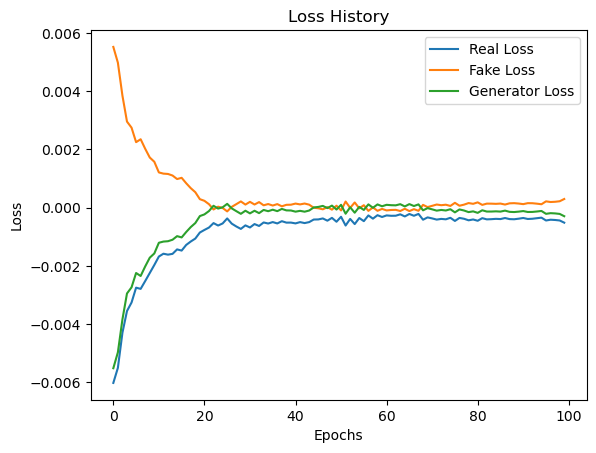

In [30]:
plt.plot(loss_history_dr, label='Real Loss')
plt.plot(loss_history_df, label='Fake Loss')
plt.plot(loss_history_g, label='Generator Loss')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(fname="./WGAN_Loss_critic_1.png")
plt.show()

In [31]:
torch.save(generator.state_dict(), "./models/W_Generator_critic_1.pth")
torch.save(discriminator.state_dict(), "./models/W_Descriminator_critic_1.pth")
del generator, discriminator